### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras 

### Loading Dataset

In [22]:
fashion_mnist=keras.datasets.fashion_mnist #loading the Dataset from the Keras
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [5]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### Data reshape

In [6]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

### Data Normalization

In [7]:
X_train_n=X_train_full/255.  ## here we dividing with 255. to get float valu
X_test_n=X_test/255.

### Splitting Dataset

In [15]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

### Create Model Architecture

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu')) #Hidden Layer 1
model.add(keras.layers.Dense(100,activation='relu'))  # Hidden Layer 2

model.add(keras.layers.Dense(10,activation='softmax')) #output Layer

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy']
)


In [16]:
model_history=model.fit(X_train,y_train,epochs=20,batch_size=64,
                       validation_data=(X_valid,y_valid))

Epoch 1/20
860/860 [==============================] - 23s 27ms/step - loss: 0.8767 - accuracy: 0.6993 - val_loss: 0.7467 - val_accuracy: 0.7364
Epoch 2/20
860/860 [==============================] - 24s 28ms/step - loss: 0.5388 - accuracy: 0.8049 - val_loss: 0.5005 - val_accuracy: 0.8132
Epoch 3/20
860/860 [==============================] - 22s 26ms/step - loss: 0.4810 - accuracy: 0.8267 - val_loss: 0.9002 - val_accuracy: 0.7122
Epoch 4/20
860/860 [==============================] - 26s 30ms/step - loss: 0.4439 - accuracy: 0.8412 - val_loss: 0.4148 - val_accuracy: 0.8566
Epoch 5/20
860/860 [==============================] - 23s 26ms/step - loss: 0.4200 - accuracy: 0.8502 - val_loss: 0.4395 - val_accuracy: 0.8460
Epoch 6/20
860/860 [==============================] - 21s 24ms/step - loss: 0.3961 - accuracy: 0.8583 - val_loss: 0.3777 - val_accuracy: 0.8708
Epoch 7/20
860/860 [==============================] - 26s 30ms/step - loss: 0.3787 - accuracy: 0.8660 - val_loss: 0.4092 - val_accuracy:

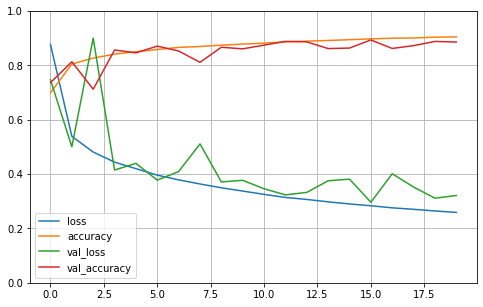

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
ev=model.evaluate(X_test_n,y_test)
ev

313/313 [==============================] - 2s 7ms/step - loss: 0.3313 - accuracy: 0.8796


[0.33125966787338257, 0.8795999884605408]

In [24]:
X_new=X_test[:3]


In [27]:
y_pred=model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [28]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


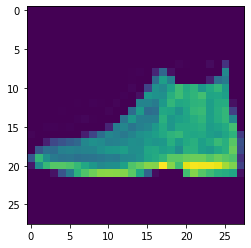

In [29]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [30]:
keras.backend.clear_session

<function keras.backend.clear_session()>

In [31]:
del model